# Lichess data visualization

Lichess data visualization

By Isthmus // Mitchell P. Krawiec-Thayer

## Import Libraries
(if you have any issues with the next cell, run `pip install -r requirements.txt` to install dependencies)

In [1]:
import isthmuslib as isli
import pandas as pd
import matplotlib.pyplot as plt
import os as os

## Set parameters

In [2]:
data_file_path = os.path.join(os.path.curdir)
data_file_name = 'puzzle_history.csv'

## Import data

Load from file

In [3]:
df = pd.read_csv(os.path.join(data_file_path, data_file_name))
df.head()

,reverse_order,id,date,win,rating
0,0,hhrYF,1624134299340,True,1777
1,1,DmlXB,1624134247927,False,1955
2,2,mqmKF,1624134227576,False,1932
3,3,3jWLM,1624134018128,True,1886
4,4,u80vy,1624133920735,True,1689


## Data overview

In [4]:
df.describe()

,reverse_order,date,rating
count,764.000000,7.640000e+02,764.000000
mean,381.500000,1.621885e+12,1791.956806
std,220.692093,2.442188e+09,112.827218
min,0.000000,1.612840e+12,1309.000000
25%,190.750000,1.622141e+12,1725.750000
50%,381.500000,1.622416e+12,1793.000000
75%,572.250000,1.623509e+12,1859.000000
max,763.000000,1.624134e+12,2246.000000


## Data visualizations

With markers

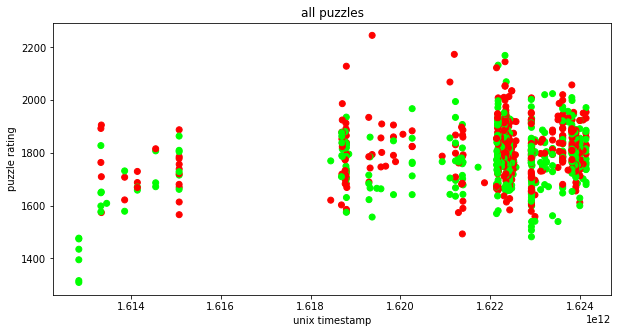

In [5]:
f = plt.figure(figsize=(10, 5), facecolor='w')
plt.scatter(df['date'], df['rating'], c=df['win'], cmap='brg', vmin=-1)
plt.xlabel('unix timestamp')
plt.title('all puzzles')
plt.ylabel('puzzle rating');

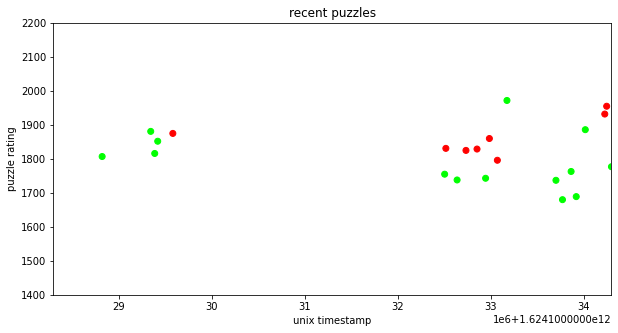

In [6]:
f = plt.figure(figsize=(10, 5), facecolor='w')
plt.scatter(df['date'], df['rating'], c=df['win'], cmap='brg', vmin=-1)
plt.xlim((max(df['date']) - 6e6, max(df['date'])))
plt.xlabel('unix timestamp')
plt.title('recent puzzles')
plt.ylabel('puzzle rating')
plt.ylim((1400, 2200));

## Stats

Constants:

In [7]:
seconds_per_week = 604800

In [8]:
number_of_days_in_data_set: int = round((max(df['date']) - min(df['date']))/(seconds_per_week*7))
print('Number of days in data set = ' + str(round(number_of_days_in_data_set)) + ' (' + str(round(number_of_days_in_data_set/365,1)) + ' years)')

Number of days in data set = 2668 (7.3 years)


In [9]:
df['date'].value_counts(bins=number_of_days_in_data_set)

(1622174339971.842, 1622178573145.424]    41
(1622910912174.994, 1622915145348.576]    31
(1622347900088.677, 1622352133262.258]    29
(1622915145348.576, 1622919378522.157]    28
(1622432563560.304, 1622436796733.885]    24
                                          ..
(1616738945093.409, 1616743178266.99]      0
(1616743178266.99, 1616747411440.572]      0
(1616747411440.572, 1616751644614.153]     0
(1616751644614.153, 1616755877787.734]     0
(1618487245782.5, 1618491478956.081]       0
Name: date, Length: 2668, dtype: int64